In [25]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.interval_clustering import IntervalKMeans
from interClusLib.visualization import ClusteringVisualization

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         42.532123        84.833058         1.227972        62.990610   
1         60.301000        75.784867        75.763271        82.623828   
2         18.594313        31.716165        20.010836        85.428432   
3         41.478883        51.791285        69.442884        72.256632   
4         43.596044        82.390683        37.896456        72.723710   
5         83.329035        86.907773        75.512363        76.323274   
6         32.225071        74.421424        24.350316        72.094978   
7         38.749470        50.881053        47.150858        92.744974   
8         25.442010        35.714269        29.199926        74.012195   
9         32.317143        95.072755        25.883872        87.628748   
10         6.699484        32.189927        16.011065        31.582

In [26]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  

<class 'interClusLib.data_structure.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)


In [27]:
distance_matrix = IntervalMetrics.pairwise_distance(random_data.get_intervals(),"hausdorff","mean")

print(distance_matrix)

[[ 0.         25.23258269 35.05175149 23.08119439 13.62523419 23.03129862
  18.64412682 21.50719054 19.95645583 17.74820972 23.04860384 11.85511875
  19.27925186 19.48116478 19.40544011 23.67715521 25.99003149 32.70561432
  22.53226668 17.57428907 25.68066992 20.30143191 22.73102281 24.6865634
  32.52186547 23.67567657 21.11210414 21.68440292 30.84794409 20.40451809]
 [25.23258269  0.         35.04699608 20.97876677 20.99245484 12.58304731
  21.42831824 16.48243759 28.08134722 21.64006308 42.85156358 19.57133317
  30.60304985 29.72592899 33.84140316 30.7577725  23.3342696  15.43981592
  23.59465843 26.79531768 34.1270836  30.27375577 25.5955359  35.40282098
  11.74027837 22.73104932 40.1497823  38.56125379 17.57087109 22.8607292 ]
 [35.05175149 35.04699608  0.         34.04969191 36.41740551 45.08331069
  17.13087135 25.07708152 20.69212443 21.70539467 30.03056583 32.28878221
  22.2002061  17.72968325 32.79214024 12.84142311 16.99539211 25.34162301
  23.1369189  22.6902533  19.37040576

In [28]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean") 

print(model.labels_)

[1 3 2 3 0 3 1 3 0 1 0 1 0 2 0 1 1 3 1 2 2 0 0 2 3 1 0 0 3 1]


In [29]:
def plot_intervals_3D(intervals, labels=None):
    fig= plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')
    ClusteringVisualization.draw_3d_interval_cubes(ax, intervals, labels)

    xs = intervals[:, 0, :].ravel()  # x_lower, x_upper
    ys = intervals[:, 1, :].ravel()  # y_lower, y_upper
    zs = intervals[:, 2, :].ravel()  # z_lower, z_upper

    x_min, x_max = xs.min() - 5, xs.max() + 5
    y_min, y_max = ys.min() - 5, ys.max() + 5
    z_min, z_max = zs.min() - 5, zs.max() + 5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_title("3D")

    plt.show()

def plot_intervals_as_squares(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6,6))
    ClusteringVisualization.draw_interval_squares(ax, intervals, labels)

    min_val = intervals.min() - 1
    max_val = intervals.max() + 1
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("Coordinate X (lower →)")
    ax.set_ylabel("Coordinate Y (lower →)")
    ax.set_title("1D Intervals as Squares")
    plt.show()

def plot_2d_intervals(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    ClusteringVisualization.draw_interval_rectangles(ax, intervals, labels=labels)
    
    # 根据 intervals 范围调整坐标
    x_vals = intervals[:, 0, :].ravel()  # 所有 x_lower, x_upper
    y_vals = intervals[:, 1, :].ravel()  # 所有 y_lower, y_upper
    x_min, x_max = x_vals.min() - 1, x_vals.max() + 1
    y_min, y_max = y_vals.min() - 1, y_vals.max() + 1
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # 让坐标系的 x,y 单位看起来相等
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("X dimension")
    ax.set_ylabel("Y dimension")
    ax.set_title("2D Interval Rectangles")
    plt.show()


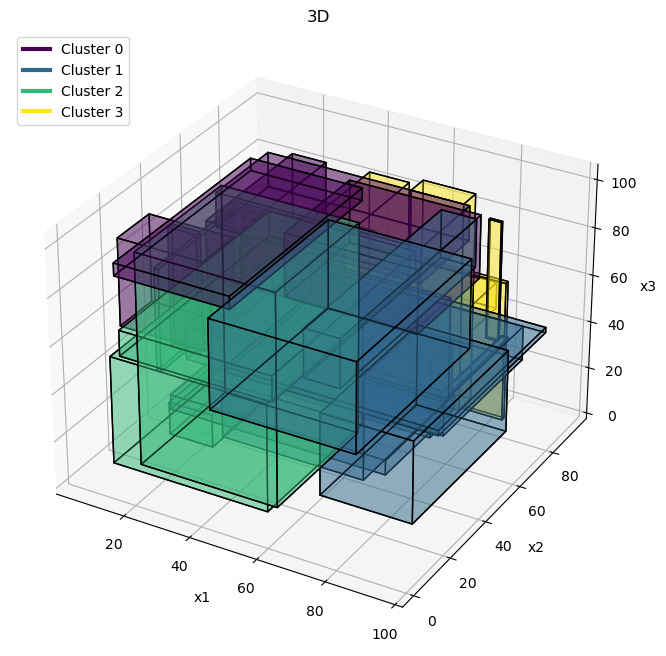

In [30]:
plot_intervals_3D(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper
0          2.262554         7.557058
1         10.003989        96.161489
2         33.125309        63.297798
3          0.977460        35.838864
4         75.952106        78.866585
5         60.248074        71.400167
6          2.890943        25.296037
7         21.681922        94.655385
8         54.148337        55.315139
9         23.368189        81.579414
10        69.644572        85.506060
11        18.947947        36.998523
12         0.287462        33.486605
13         5.377284        17.982843
14        14.385994        32.960098
15        53.229440        77.911768
16        39.211263        89.353882
17         1.483941        10.242538
18         8.500474        17.235541
19        19.461685        80.980227
20        31.794511        67.369196
21        41.001801        89.549505
22         8.565733        89.847190
23        53.237215        85.760148
24        49.092731        95.882840
25        10.4

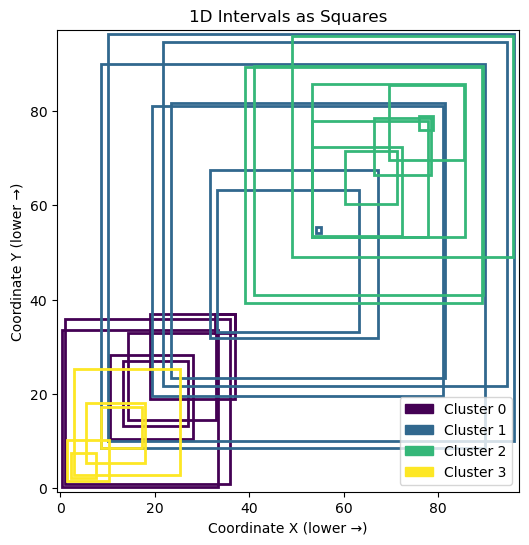

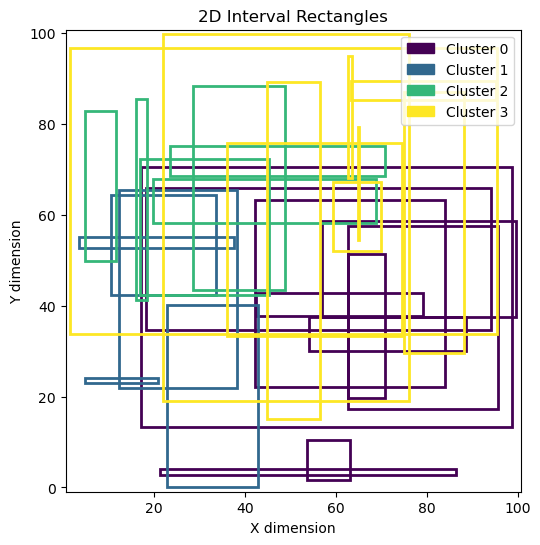

In [31]:
random_data = IntervalData.random_data(30, 1)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean")

plot_intervals_as_squares(random_data.get_intervals(), model.labels_)

random_data = IntervalData.random_data(30, 2)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean")

plot_2d_intervals(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper
0          7.495003        90.158973        27.353801        57.031918
1          8.888187         9.134517        17.141541        75.791848
2          9.030235        56.875012        12.103942        21.975780
3         15.776884        52.007812        21.184758        32.914475
4          2.256385         4.742581        59.789425        68.430247
5         12.005481        34.542501        37.788287        71.726476
6         62.442550        82.835667        42.563320        60.543379
7         20.179366        43.171785        38.107746        47.856270
8         41.151538        47.552091        57.253158        96.409370
9         76.756628        99.690925        15.898671        85.316651
10        71.072065        95.681430        18.212942        71.983327
11        56.180154        81.555839        15.666002        81.382496
12        32.461057        81.031559        33.544519

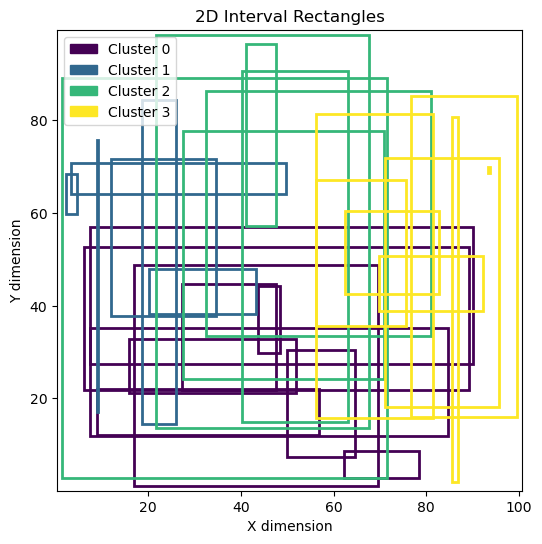

In [32]:
random_data = IntervalData.random_data(30, 2)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean")

plot_2d_intervals(random_data.get_intervals(), model.labels_)